In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
contry_avg_temp = pd.read_csv('country_yearly_avg_temp.csv')
df.head(5)

,Country,Year,YearlyAvgTemperature
0,Albania,1997,71.934783
1,Albania,1998,61.612500
2,Albania,1999,63.116961
3,Albania,2000,63.176945
4,Albania,2001,61.235600


In [9]:
continents_df = pd.read_csv('continent_data.csv')
continents_df.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [19]:
co2_df = pd.read_csv('co2_data.csv', header=2)
co2_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN,NaN


## Average temperature change from 1995-2020 in countries and continent

In [11]:
#first we have to merge the continents and avg temp data set 
avg_temp_continent_country = continents_df.merge(contry_avg_temp, on='Country', how='inner')
avg_temp_continent_country.head()
avg_temp_continent_country.dropna()

,Continent,Country,Year,YearlyAvgTemperature
0,Africa,Algeria,1995,64.410468
1,Africa,Algeria,1996,63.530220
2,Africa,Algeria,1997,64.926301
3,Africa,Algeria,1998,63.619668
4,Africa,Algeria,1999,64.923626
...,...,...,...,...
2878,South America,Venezuela,2016,81.707055
2879,South America,Venezuela,2017,82.844575
2880,South America,Venezuela,2018,79.969714
2881,South America,Venezuela,2019,79.816715


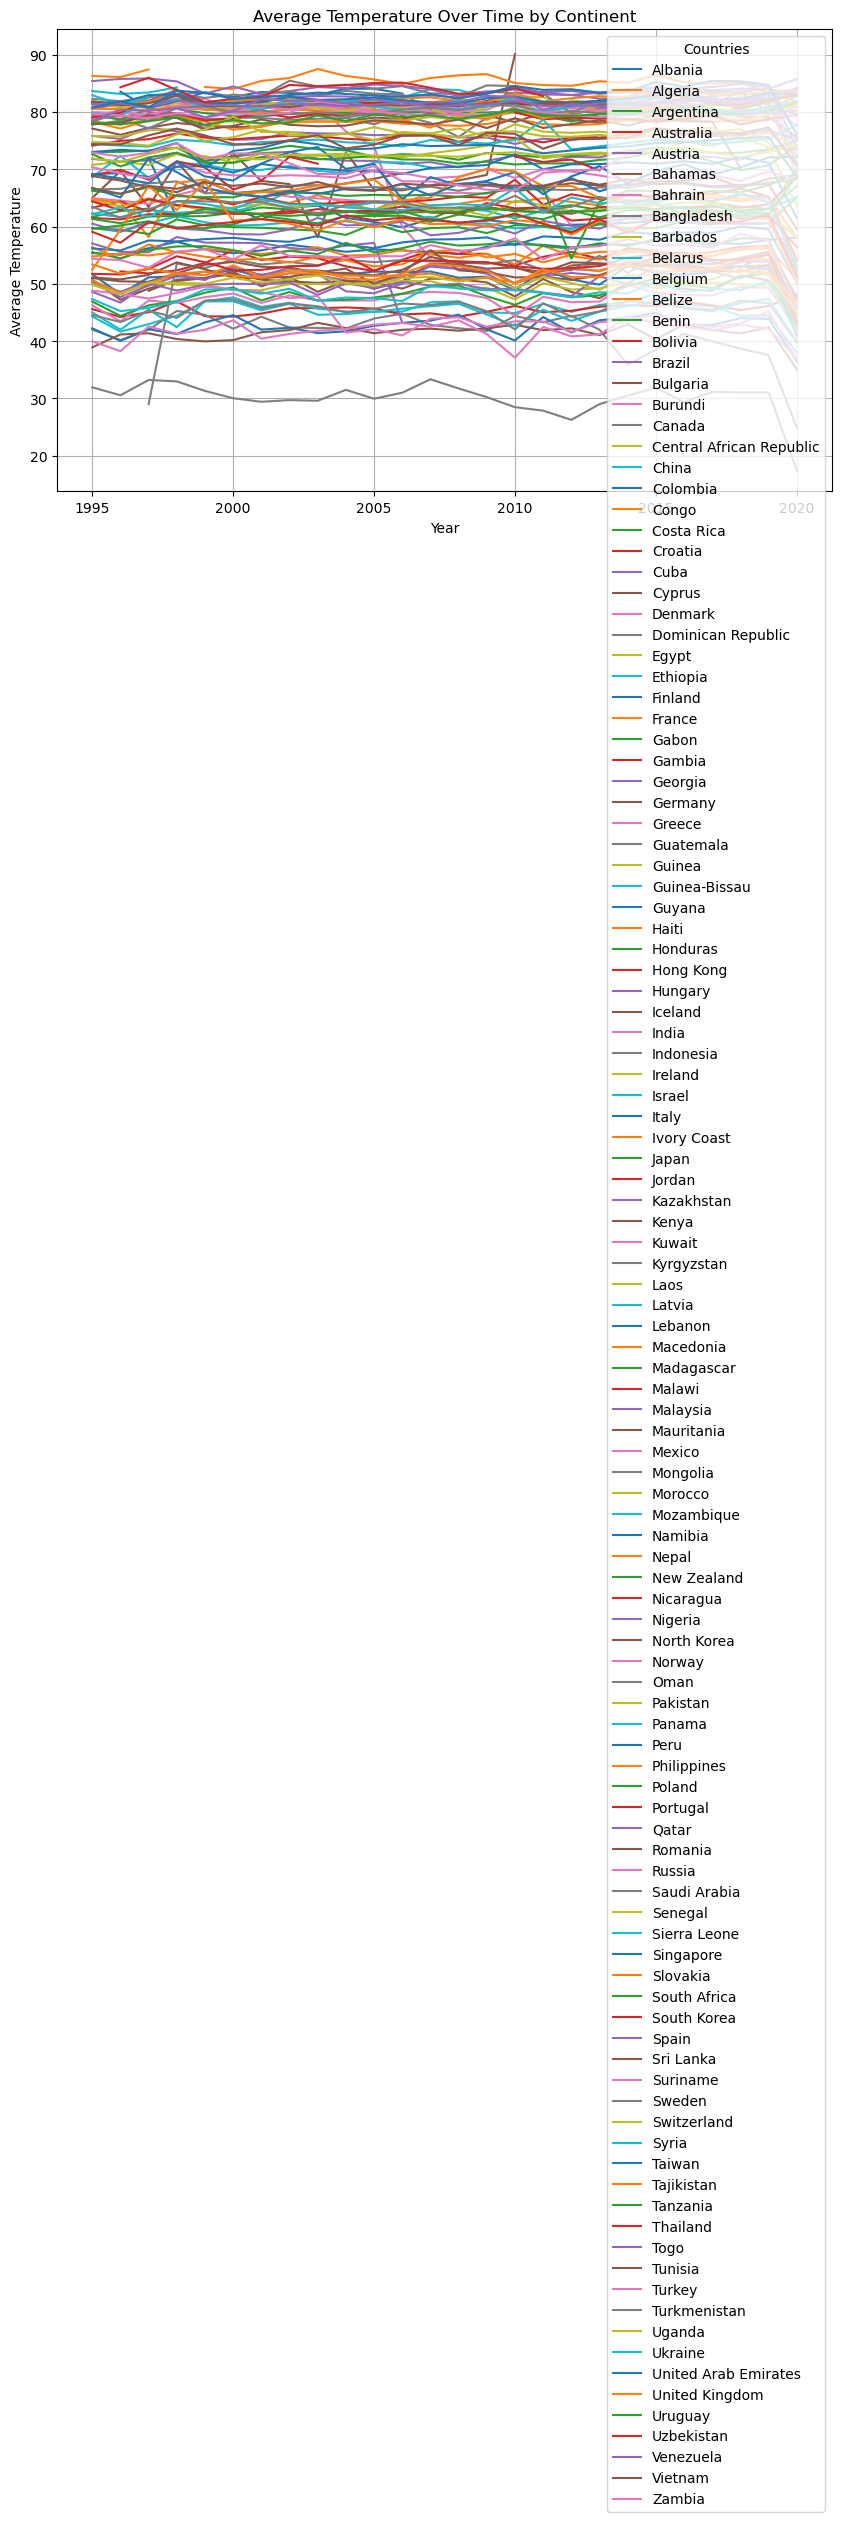

In [18]:
#plotting the change in avg temp in countries over time
pivot_df = avg_temp_continent_country.pivot(index='Year', columns='Country', values='YearlyAvgTemperature')

# Plot
pivot_df.plot(kind='line', figsize=(10, 6))

plt.title('Average Temperature Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend(title='Countries')
plt.grid(True)

plt.show()

In [15]:
# I need to make a function that will get the avg temp for the continent as a whole
#to do this I have to group all countries in a continent and get the mean of the avg temps
def calculate_continent_avg(avg_temp_continent_country):
    # Group by Continent and Year and calculate the mean of YearlyAvgTemperature
    continent_year_avg = avg_temp_continent_country.groupby(['Continent', 'Year'])['YearlyAvgTemperature'].mean().reset_index()

    # Return the result
    return continent_year_avg

# Calculate continent average temperatures
continent_avg_temps = calculate_continent_avg(avg_temp_continent_country)
continent_avg_temps.head()

,Continent,Year,YearlyAvgTemperature
0,Africa,1995,74.475155
1,Africa,1996,74.039066
2,Africa,1997,74.570620
3,Africa,1998,74.947426
4,Africa,1999,73.639955


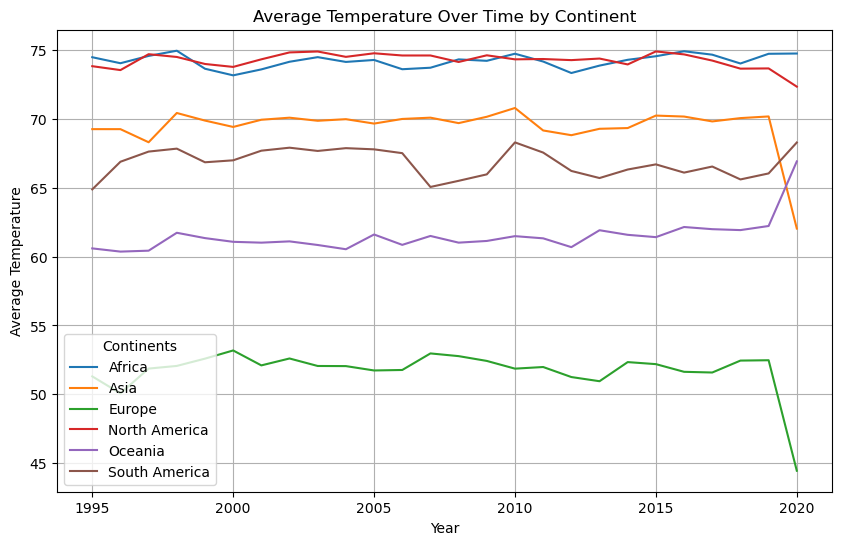

In [17]:
#now we just have to plot the new data set to see the change in avg temperatures in continents over 25 years
df_pivot = continent_avg_temps.pivot(index='Year', columns='Continent', values='YearlyAvgTemperature')

# Plot
df_pivot.plot(kind='line', figsize=(10, 6))

plt.title('Average Temperature Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend(title='Continents')
plt.grid(True)

plt.show()

## change in co2 over time

In [21]:
co2_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.960430,0.941337,0.933874,0.921453,0.915294,0.795420,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.297972,0.268359,0.281196,0.299083,0.297564,0.223479,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.475577,0.479775,0.465166,0.475817,0.490837,0.463150,NaN,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,1.125185,1.012552,0.829723,0.755828,0.753638,0.592743,NaN,NaN,NaN,NaN


In [25]:
# Reshape the DataFrame from wide to long format
co2_df_long = pd.melt(co2_df, 
                  id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                  var_name='Year', 
                  value_name='CO2 emissions (metric tons per capita)')

# Drop rows with NaN values in the CO2 emissions column
co2_df_long.dropna(subset=['CO2 emissions (metric tons per capita)'], inplace=True)

# Convert 'Year' column to integer
co2_df_long['Year'] = co2_df_long['Year'].astype(int)

# Filter the DataFrame to include only the years between 1995 and 2020
df_filtered = co2_df_long[(co2_df_long['Year'] >= 1995) & (co2_df_long['Year'] <= 2020)]

# Rename columns for clarity
df_filtered.rename(columns={'Country Name': 'Country'}, inplace=True)

df_filtered.tail()

/var/folders/c7/symnjm6d69x6p3rtw2qvqmyc0000gn/T/ipykernel_69715/2487863494.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'Country Name': 'Country'}, inplace=True)


,Country,Country Code,Indicator Name,Indicator Code,Year,CO2 emissions (metric tons per capita)
16220,Samoa,WSM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2020,0.960782
16222,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2020,0.308515
16223,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2020,6.687563
16224,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2020,0.401903
16225,Zimbabwe,ZWE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2020,0.530484


In [26]:

avg_c02_continent_country = continents_df.merge(df_filtered, on='Country', how='inner')

In [39]:
# I need to make a function that will get the avg co2 for the continent as a whole
#to do this I have to group all countries in a continent and get the mean of the avg co2
def calculate_continent_avg_co2(avg_c02_continent_country):
    # Group by Continent and Year and calculate the mean of YearlyAvgTemperature
    continent_year_avg_co2 = avg_c02_continent_country.groupby(['Continent', 'Year'])['CO2 emissions (metric tons per capita)'].mean().reset_index()

    # Return the result
    return continent_year_avg_co2

# Calculate continent average temperatures
continent_avg_co2 = calculate_continent_avg_co2(avg_c02_continent_country)
continent_avg_co2.rename(columns={'CO2 emissions (metric tons per capita)': 'avg co2 of the continent'}, inplace=True)
continent_avg_co2.head()

,Continent,Year,avg co2 of the continent
0,Africa,1995,0.951933
1,Africa,1996,0.983782
2,Africa,1997,0.986238
3,Africa,1998,1.021363
4,Africa,1999,1.061810


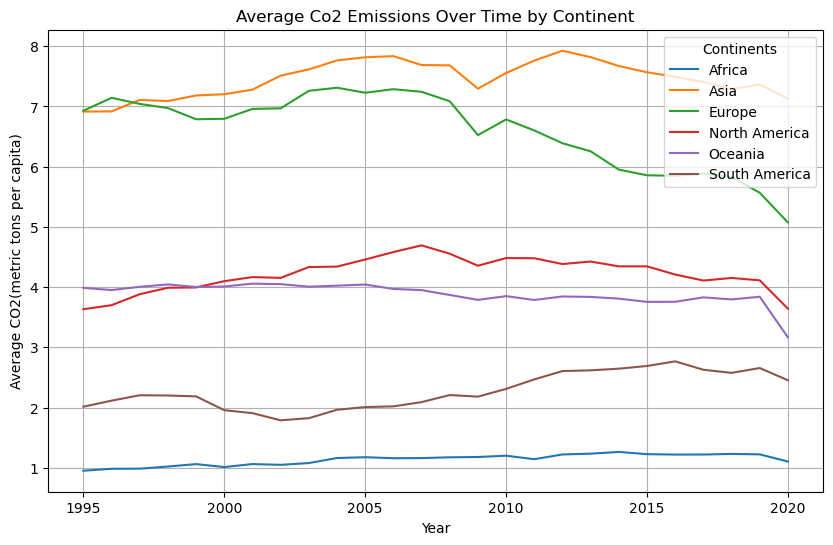

In [41]:
df_pivot_co2 = continent_avg_co2.pivot(index='Year', columns='Continent', values='avg co2 of the continent')

# Plot
df_pivot_co2.plot(kind='line', figsize=(10, 6))

plt.title('Average Co2 Emissions Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Average CO2(metric tons per capita)')
plt.legend(title='Continents')
plt.grid(True)

plt.show()

In [31]:
avg_co2_temp_continent_country = avg_c02_continent_country.merge(contry_avg_temp, on=['Country', 'Year'], how='inner')

In [32]:
avg_co2_temp_continent_country.head()

,Continent,Country,Country Code,Indicator Name,Indicator Code,Year,CO2 emissions (metric tons per capita),YearlyAvgTemperature
0,Africa,Algeria,DZA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1995,2.684182,64.410468
1,Africa,Algeria,DZA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1996,2.626350,63.530220
2,Africa,Algeria,DZA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1997,2.525211,64.926301
3,Africa,Algeria,DZA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1998,2.494567,63.619668
4,Africa,Algeria,DZA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1999,2.554046,64.923626


In [33]:
avg_co2_temp_continent_country.to_csv('avg_co2_temp_continent', index=False)

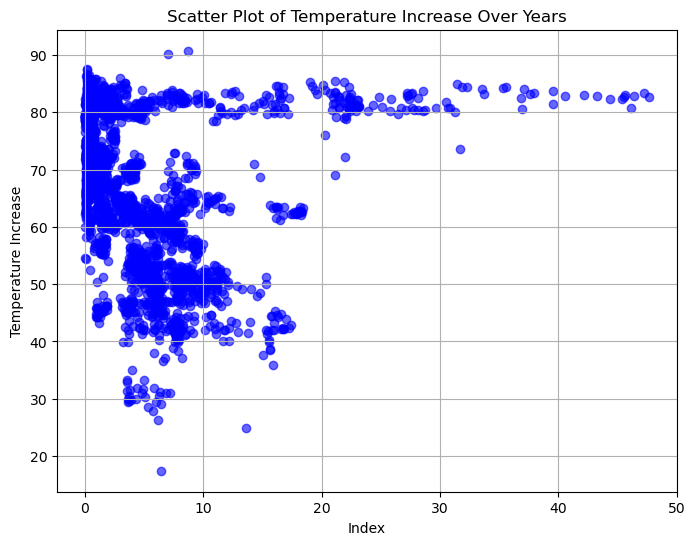

In [35]:
#create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(avg_co2_temp_continent_country['CO2 emissions (metric tons per capita)'], avg_co2_temp_continent_country['YearlyAvgTemperature'], color='blue', alpha=0.6)  # Scatter plot with index on x-axis and Temp_increase on y-axis
plt.xlabel('Index')
plt.ylabel('Temperature Increase')
plt.title('Scatter Plot of Temperature Increase Over Years')
plt.grid(True)
plt.show()